In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rc('font', family='serif')
plt.rcParams.update({
                      "text.usetex": True,
                      "font.family": "serif",
                      'text.latex.preamble': r'\usepackage{amsmath}',
                      'font.size': 20,
                      'lines.linewidth': 3,
                      'axes.labelsize': 22,  
                      'axes.titlesize': 24,
                      'xtick.labelsize': 20,
                      'ytick.labelsize': 20,
                      'legend.fontsize': 20,
                      'axes.linewidth': 2})

In [3]:
df = pd.read_csv('bumps2d_linear_decoder_dim_seed_sweep.csv')
linear_dec = df[['eps_dim','seed','max_mmd']].pivot(index='seed', columns=['eps_dim'])['max_mmd']
print(linear_dec)

df = pd.read_csv('bumps2d_nonlinear_decoder_dim_seed_sweep.csv')
nonlinear_dec = df[['eps_dim','seed','max_mmd']].pivot(index='seed', columns=['eps_dim'])['max_mmd']
print(nonlinear_dec)

axis_labels = [str(i) for i in list(nonlinear_dec.columns)]

eps_dim       4         32        64        128       256       512
seed                                                               
0        0.418094  0.259197  0.272099  0.287098  0.332485  0.517970
1        0.418337  0.263529  0.257264  0.293150  0.321329  0.509590
2        0.420310  0.261495  0.268801  0.299369  0.314465  0.452011
3        0.416017  0.257677  0.272156  0.309324  0.343242  0.530782
4        0.416246  0.250125  0.267807  0.298245  0.331151  0.515000
eps_dim       4         32        64        128       256       512
seed                                                               
0        0.008825  0.011830  0.010918  0.013965  0.011192  0.342116
1        0.008680  0.011962  0.009422  0.008606  0.021467  0.069446
2        0.008373  0.009739  0.009541  0.010535  0.010533  0.050812
3        0.010436  0.011718  0.017648  0.017134  0.057214  0.288440
4        0.010282  0.007814  0.009027  0.016647  0.032794  0.251260


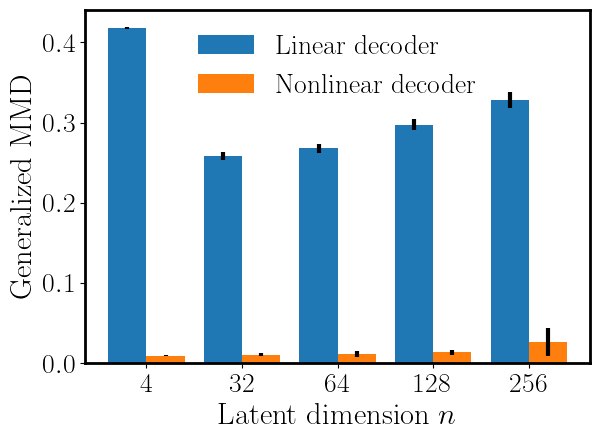

In [7]:
width = 0.4

lin_dec = linear_dec.to_numpy()[:,:-1]
nonlin_dec = nonlinear_dec.to_numpy()[:,:-1]

plt.figure()
plt.bar(np.arange(lin_dec.shape[1]), lin_dec.mean(0), yerr=lin_dec.std(0), width=width, label='Linear decoder')
plt.bar(np.arange(lin_dec.shape[1])+width, nonlin_dec.mean(0), yerr=nonlin_dec.std(0), width=width, label='Nonlinear decoder')
plt.legend(frameon=False)
plt.xlabel(r'Latent dimension $n$')
plt.ylabel('Generalized MMD')
# plt.yscale('log')
plt.xticks(np.arange(lin_dec.shape[1])+width/2, ['4','32','64','128','256'])
plt.tight_layout()
plt.savefig("bumps2d_sweep.png", bbox_inches='tight', dpi=600)
plt.show()

